In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

df.shape

(20800, 5)

<AxesSubplot:>

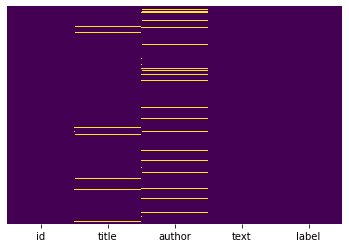

In [2]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# dropping Nan values
df= df.dropna()
df.shape

(18285, 5)

In [6]:
# Independent features
X=df.drop('label',axis=1)

# Label column
y=df['label']

X.shape

(18285, 4)

In [7]:
messages = X.copy()
messages.reset_index(inplace=True)

# Text Preprocessing

In [8]:
import nltk
import re # regular expressions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [9]:
# Dataset Preprocessing
corpus = []
for i in range (0,len(messages)):
    msg =re.sub('[^a-zA-Z]',' ',messages['title'][i]) # Substitute all numeric values and symbols with space ' '
    msg =msg.lower().split()
    # Eliminating the stop words and stemming others
    msg =[wordnet.lemmatize(word) for word in msg if not word in stopwords.words('English')]
    msg= ' '.join(msg)
    corpus.append(msg)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000)
X =cv.fit_transform(corpus).toarray()
np.shape(X)

(18285, 2000)

# Creating train and test sets

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# Model Training

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, np.ravel(y_train))

# Performance Evaluation

In [46]:


y_pred=model.predict(X_test)



from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print(cm)
print(acc)

[[1863  219]
 [  56 1519]]
0.9248017500683621
